In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as mt

In [4]:
from google.colab import files
uploaded = files.upload()

import io
veri = pd.read_csv(io.BytesIO(uploaded['NetflixOriginals.csv']),encoding="ISO-8859-1") 

Saving NetflixOriginals.csv to NetflixOriginals (1).csv


In [15]:
veri



,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


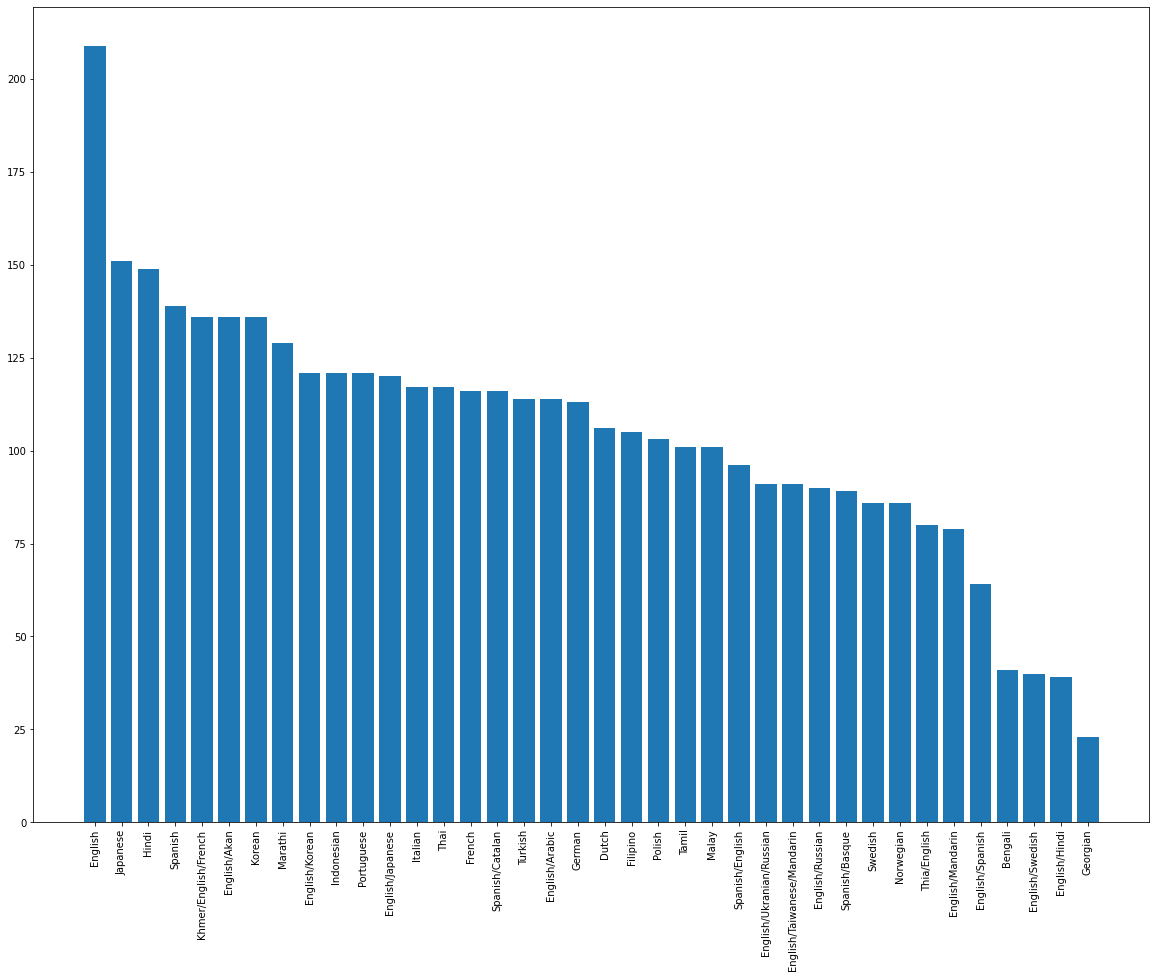

In [13]:
soru1 = veri
soru1 = soru1.sort_values("Runtime",ascending=False)
soru1.head(5)


f = mt.figure()
f.set_figwidth(20)
f.set_figheight(15)

mt.bar(soru1["Language"],soru1["Runtime"])
mt.xticks(rotation=90)


mt.show()

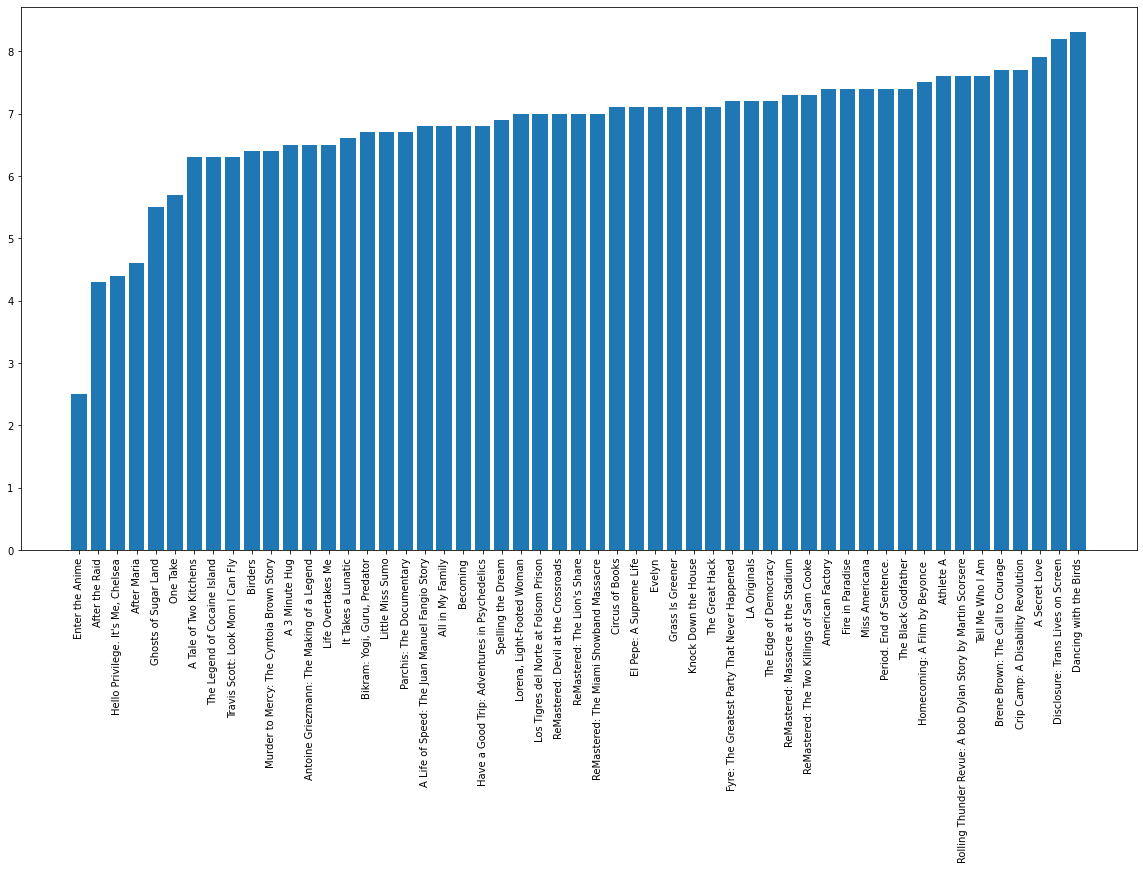

In [ ]:
soru2 = veri
intpremiere = []
for i in soru2["Premiere"]:
  if "January" in i:
    intpremiere.append(1)
  elif "February" in i:
    intpremiere.append(2)
  elif "March" in i:
    intpremiere.append(3)
  elif "April" in i:
    intpremiere.append(4)
  elif "May" in i:
    intpremiere.append(5)
  elif "June" in i:
    intpremiere.append(6)
  elif "July" in i:
    intpremiere.append(7)
  elif "August" in i:
    intpremiere.append(8)
  elif "September" in i:
    intpremiere.append(9)
  elif "October" in i:
    intpremiere.append(10)
  elif "November" in i:
    intpremiere.append(11)
  elif "December" in i:
    intpremiere.append(12)
soru2["intPremiere"] = intpremiere

docList= []
indexlist = []
say = 0

for i in soru2["Premiere"]:
  if "2019" in i or ("2020" in i and soru2["intPremiere"][say] <= 6):
    if soru2["Genre"][say] == "Documentary":
      indexlist.append(say)
  say+=1



Result= soru2.loc[indexlist,['Title', 'Genre','IMDB Score','Premiere','intPremiere']]

f = mt.figure()
f.set_figwidth(20)
f.set_figheight(10)

mt.bar(Result["Title"], Result["IMDB Score"])
mt.xticks(rotation=90)

mt.show()

In [ ]:
from numpy.core.shape_base import stack
Soru3 = veri

Soru3indexlist = []
Say3=0
for i in Soru3["Language"]:
  if "English" in i:
    Soru3indexlist.append(Say3)
  Say3 +=1
Genrelist = []

inglist= Soru3.loc[Soru3indexlist,['Title', 'Genre','IMDB Score','Language']]

for x in inglist["Genre"]:
  if x not in Genrelist:
    Genrelist.append(x)


Genrelist
inglist
boslist =[]
toplalist = []
adetlist1=[]
topla = 0
indexo = 0
sayici=0


for i in inglist["IMDB Score"]:
  boslist.append(i)

for x in Genrelist:
  for y in inglist["Genre"]:
    if y in x:
      topla += float(boslist[indexo])
    indexo += 1
    
  toplalist.append(topla)
  adetlist1.append(sayici)
  indexo = 0
  topla =0

Genrelist
toplalist

film1 = pd.DataFrame({'Genre':[x for x in Genrelist] , 'Toplam IMDB': [x for x in toplalist]})
film1 = film1.sort_values('Toplam IMDB',ascending=False)
film1.head(5)

,Genre,Toplam IMDB
0,Documentary,947.8
95,Drama-Comedy,418.0
68,Drama/Horror,275.8
9,Science fiction/Drama,271.2
84,Drama / Short,250.4


In [ ]:
soru4 = veri

filmlist =[]
sayo = 0
for i in soru4["Language"]:
  if "Hindi" in i:
    filmlist.append([soru4["Title"][sayo],soru4["Runtime"][sayo]])
  sayo += 1

Topla=0

for x in soru4["Runtime"]:
  Topla += int(x)

film = pd.DataFrame({'Title':[x[0] for x in filmlist] , 'runtime': [x[1] for x in filmlist]})
film = film.sort_values("runtime",ascending=False)
film.head(5)
print("Hindi")
print("Toplam Runtime =" , Topla)
print("Ortalama Runtime =" , Topla/len(soru4["Runtime"]))

Hindi
Toplam Runtime = 54649
Ortalama Runtime = 93.57705479452055


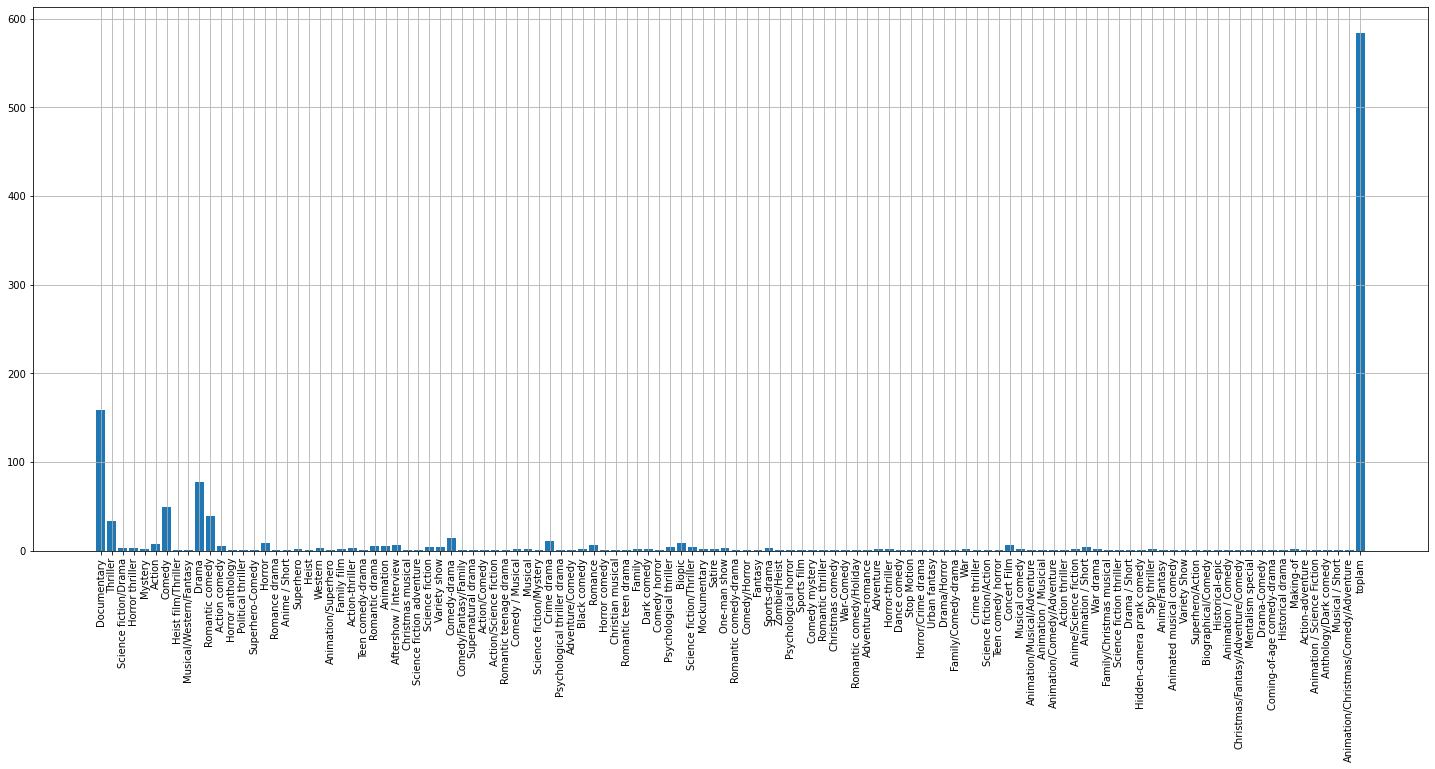

In [ ]:
soru5 = veri

Genrelist1 = []
adetlistto = []
geninirolisto = [] 



for x in soru5["Genre"]:
  geninirolisto.append(x)
  if x not in Genrelist1:
    Genrelist1.append(x)

for i in Genrelist1:
  adetlistto.append(geninirolisto.count(i))

adetlistto
Genrelist1

adetlistto.append(sum(adetlistto))
Genrelist1.append("toplam")


f = mt.figure()
f.set_figwidth(25)
f.set_figheight(10)

mt.bar(Genrelist1, adetlistto)
mt.xticks(rotation=90)
mt.grid()

mt.show()


In [ ]:
soru6 = veri
dillist1 = []
sonuclist= []
toplamma= 0

for i in soru6["Language"]:
  if i not in dillist1:
    dillist1.append(i)

for i in dillist1:
  for x in soru6["Language"]:
    if i == x:
      toplamma += 1
  sonuclist.append(toplamma)
  toplamma = 0

dillist1
sonuclist

dil = pd.DataFrame({'Language':[x for x in dillist1] , 'Prc': [x for x in sonuclist]})
dil = dil.sort_values("Prc",ascending=False)
dil.head(3)

,Language,Prc
3,English,401
4,Hindi,33
1,Spanish,31


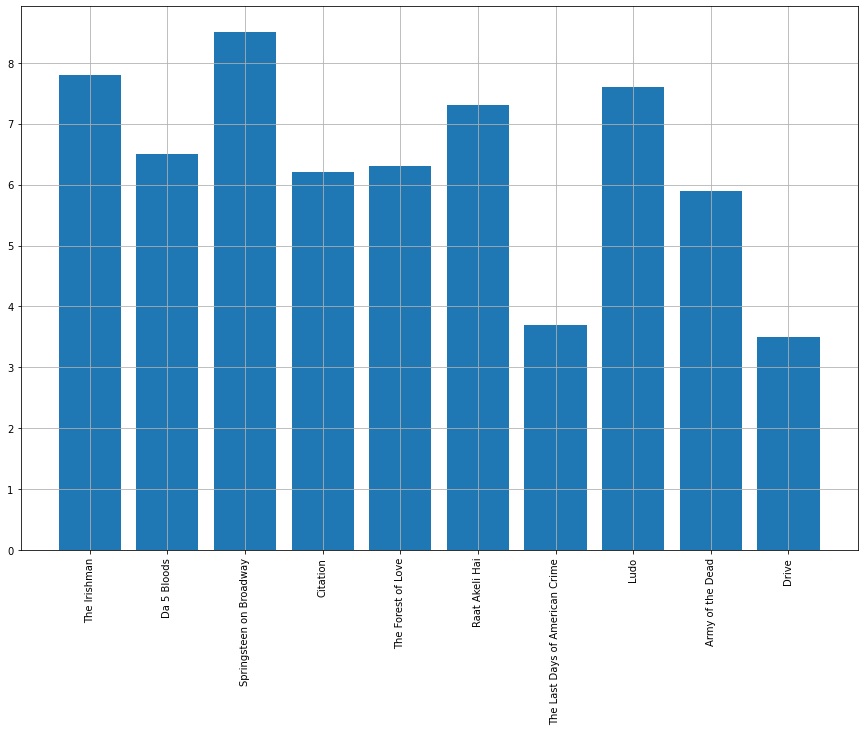

In [ ]:
soru7 = veri

soru7 = veri.sort_values("IMDB Score",ascending=False)
result = soru1.head(10)



f = mt.figure()
f.set_figwidth(15)
f.set_figheight(10)

mt.bar(result["Title"], result["IMDB Score"])
mt.xticks(rotation=90)
mt.grid()

mt.show()

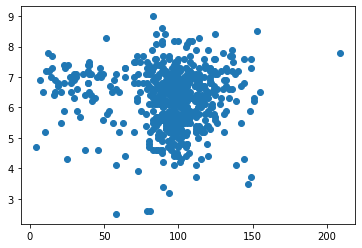

In [ ]:
soru8 = veri

mt.scatter(soru8["Runtime"],soru8["IMDB Score"])
mt.show()

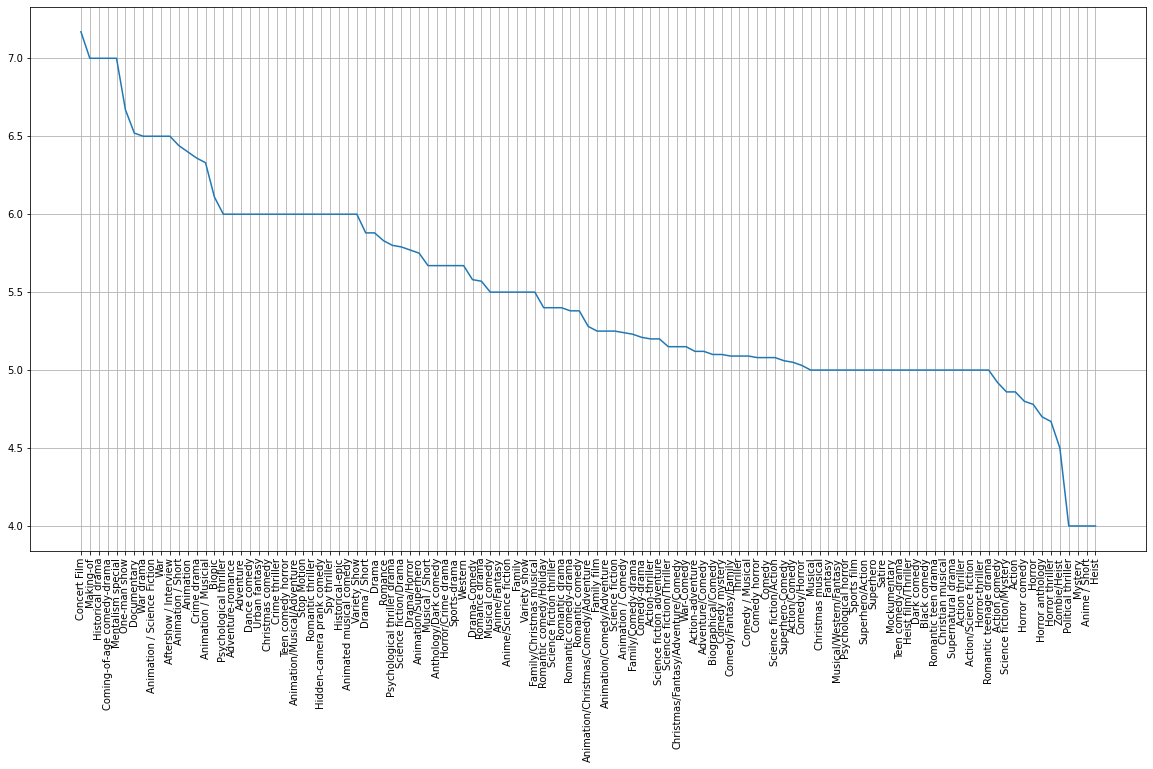

In [ ]:
soru9 = veri

Genrelist2 = []


for x in soru9["Genre"]:
  if x not in Genrelist2:
    Genrelist2.append(x)

Genrelist2
topl = 0
adetsay = 0
listindex = 0
imdbsum =[]
for x in Genrelist2:
  for y in soru9["Genre"]:
    if y in x:
      topl += int(soru9["IMDB Score"][listindex])
      adetsay += 1
    listindex += 1
    
  imdbsum.append(round(topl/adetsay,2))
  listindex = 0
  topl =0
  adetsay = 0


avg = pd.DataFrame({'genre':[x for x in Genrelist2] , 'IMDB AVG': [x for x in imdbsum]})
avg = avg.sort_values("IMDB AVG",ascending=False)
avg.head(10)


f = mt.figure()
f.set_figwidth(20)
f.set_figheight(10)

mt.plot(avg["genre"],avg["IMDB AVG"])
mt.xticks(rotation=90)
mt.grid()

mt.show()

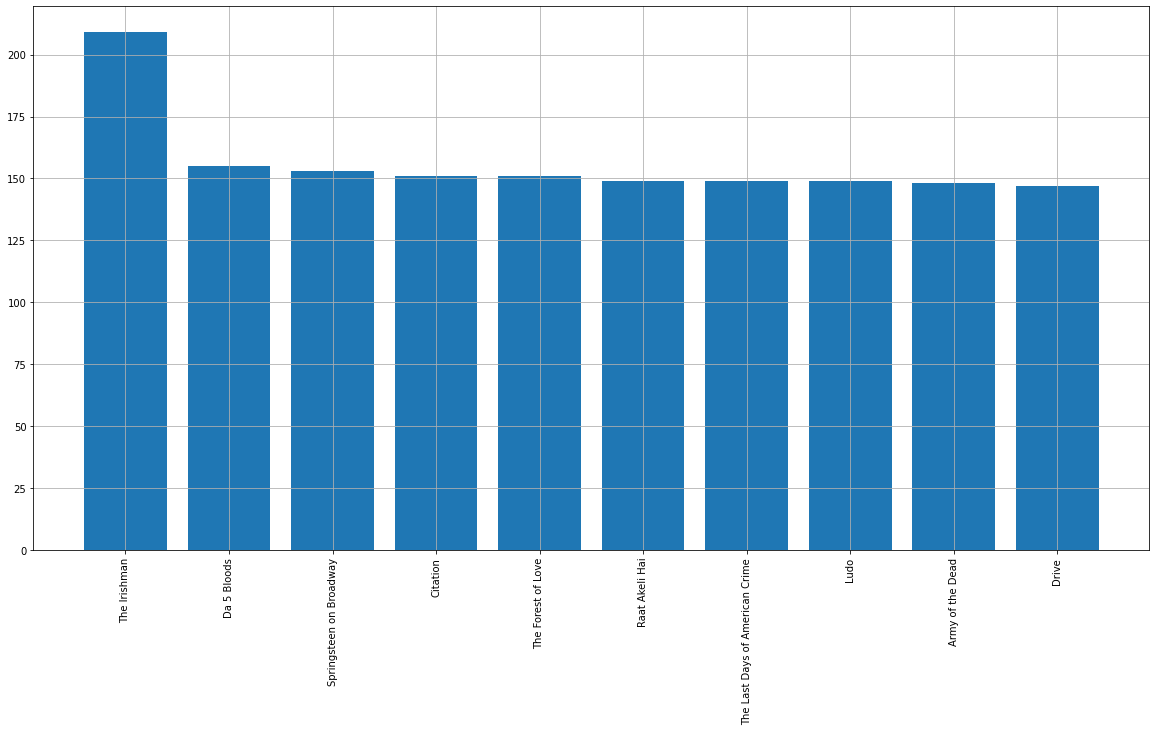

In [ ]:
soru10 = veri
soru10 = soru10.sort_values("Runtime",ascending=False)
result = soru10.head(10)

f = mt.figure()
f.set_figwidth(20)
f.set_figheight(10)

mt.bar(result["Title"],result["Runtime"])
mt.xticks(rotation=90)
mt.grid()

mt.show()


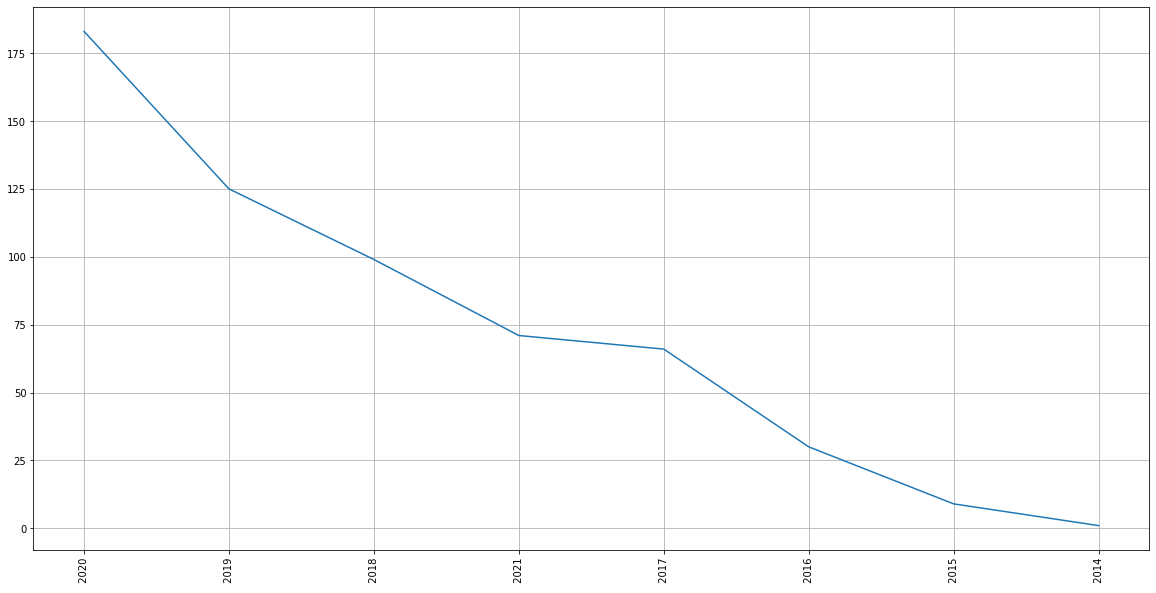

In [ ]:
soru11 = veri

Tarihlist = []
for i in soru11["Premiere"]:
  Tarihlist.append(i.split(","))
Tarihlist


taradet=[]
for i in Tarihlist:
  if len(i) == 2:
    if i[1] not in taradet:
      taradet.append(i[1])
taradet
Saydım =0
Adetolisto=[]
for i in taradet:
  for x in soru11["Premiere"]:
    if i in x:
      Saydım+=1
  Adetolisto.append(Saydım)
  Saydım =0
Adetolisto

adetli = pd.DataFrame({'years':[x for x in taradet] , 'prc': [x for x in Adetolisto]})
adetli = adetli.sort_values("prc",ascending=False)
result = adetli.head(10)


f = mt.figure()
f.set_figwidth(20)
f.set_figheight(10)

mt.plot(result["years"],result["prc"])
mt.xticks(rotation=90)
mt.grid()

mt.show()

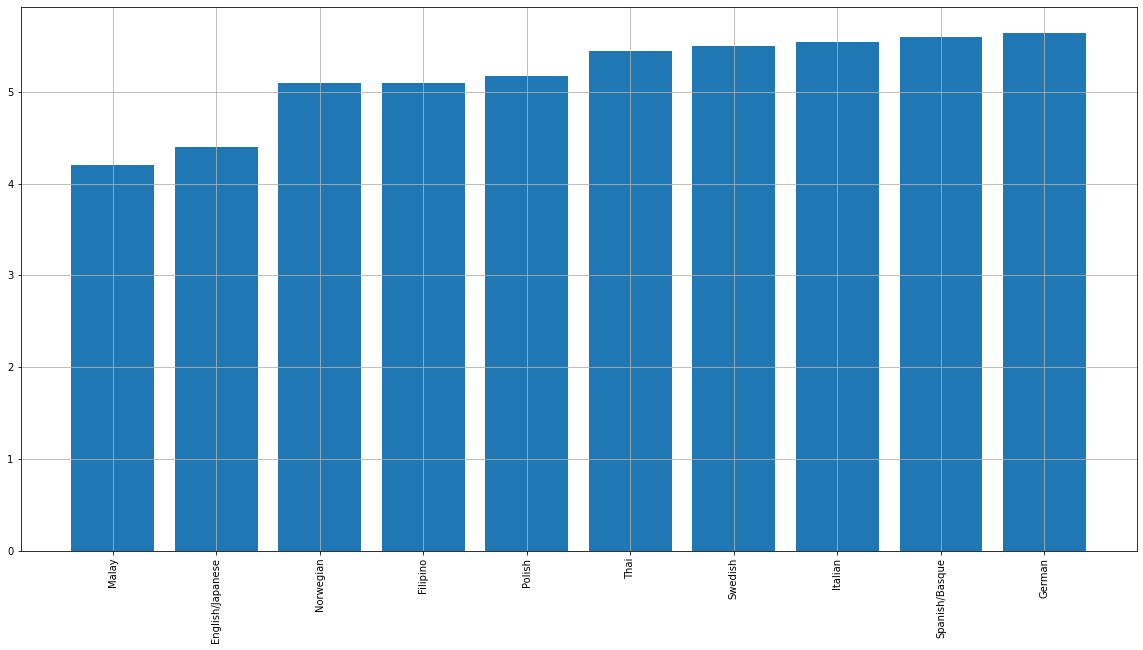

In [ ]:
Soru12= veri


Dillolisto= []

for i in Soru12["Language"]:
  if i not in Dillolisto:
    Dillolisto.append(i)

İmdblistoli=[]
İndexsaybe=0
Toplabe= 0
Saysay=0
for i in Dillolisto:
  for x in Soru12["Language"]:
    if i == x:
      Toplabe +=float(Soru12["IMDB Score"][İndexsaybe])
      Saysay +=1
    İndexsaybe +=1
  İmdblistoli.append(round(Toplabe/Saysay,2))
  Saysay =0
  İndexsaybe =0
  Toplabe = 0
Dillolisto
İmdblistoli

Dilimdb= pd.DataFrame({'Language':[x for x in Dillolisto] , 'avg': [x for x in İmdblistoli]})
Dilimdb = Dilimdb.sort_values("avg")
result = Dilimdb.head(10)

f = mt.figure()
f.set_figwidth(20)
f.set_figheight(10)

mt.bar(result["Language"],result["avg"])
mt.xticks(rotation=90)
mt.grid()

mt.show()

In [ ]:
Soru13 = veri

taradet
Runtimesum =[]
Toplamcı = 0
İndexci=0
for i in taradet:
  for x in Soru13["Premiere"]:
    if i in x:
      Toplamcı += int(Soru13["Runtime"][İndexci])
    İndexci+=1
  İndexci=0
  Runtimesum.append(Toplamcı)
  Toplamcı = 0

Run= pd.DataFrame({'years':[x for x in taradet] , 'Runtime': [x for x in Runtimesum]})
Run= Run.sort_values("Runtime",ascending=False)
Run.head(10)

,years,Runtime
1,2020,17384
0,2019,10856
2,2018,9405
3,2021,7214
5,2017,6129
4,2016,2766
6,2015,814
7,2014,81


In [ ]:
soru14 = veri

Genrelist2
Dillolisto
listiki = []
indexlist5 = []
nihalist = []
say5 = 0

for a in soru14["Genre"]:
  listiki.append(a)
for i in Dillolisto:
  for x in soru14["Language"]:
    if x == i:
      indexlist5.append(listiki[say5])
    say5 += 1
  nihalist.append([indexlist5,i])
  indexlist5 = []
  say5 = 0



for i in nihalist:
  Listom =[]
  adeti = []
  Saybaklim=0
  for x in i[0]:
    if x not in Listom:
      Listom.append(x)
  for p in Listom:
    i.append([i[0].count(p),p])
  del i[0]

listom2 = [[],[],[]]    
for i in nihalist:
  adet = len(i)
  buyuk = 0
  
  for x in range(1,adet):
    y = i[x]
    if y[0] > buyuk:
      buyuk = y[0]
  listom2[0].append(y[1])
  listom2[1].append(buyuk)
  listom2[2].append(i[0])



print(listom2[0])
print(listom2[1])
print(listom2[2])

salo = pd.DataFrame({'Lang': listom2[2],"Genre" : [x for x in listom2[0]], "PRC":[y for y in listom2[1]]})
salo = salo.sort_values("PRC",ascending=False)
salo.head(10)



['Crime drama', 'Making-of', 'Crime drama', 'Animation/Christmas/Comedy/Adventure', 'Anthology/Dark comedy', 'Drama', 'Documentary', 'Action-thriller', 'Action comedy', 'Crime drama', 'Science fiction thriller', 'Documentary', 'Documentary', 'Thriller', 'Romantic comedy', 'Thriller', 'Horror', 'Comedy-drama', 'Documentary', 'Thriller', 'Documentary', 'Black comedy', 'Documentary', 'Documentary', 'Drama', 'Documentary', 'Documentary', 'Documentary', 'Documentary', 'Drama', 'Documentary', 'Drama', 'Documentary', 'Action-adventure', 'Documentary', 'Documentary', 'War drama', 'Documentary']
[1, 8, 4, 120, 13, 2, 2, 3, 1, 1, 6, 5, 6, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1]
['English/Japanese', 'Spanish', 'Italian', 'English', 'Hindi', 'Turkish', 'Korean', 'Indonesian', 'Malay', 'Dutch', 'French', 'English/Spanish', 'Portuguese', 'Filipino', 'German', 'Polish', 'Norwegian', 'Marathi', 'Thai', 'Swedish', 'Japanese', 'Spanish/Basque', 'Spanish/Catalan', 'Engl

,Lang,Genre,PRC
3,English,Animation/Christmas/Comedy/Adventure,120
4,Hindi,Anthology/Dark comedy,13
1,Spanish,Making-of,8
12,Portuguese,Documentary,6
10,French,Science fiction thriller,6
11,English/Spanish,Documentary,5
2,Italian,Crime drama,4
7,Indonesian,Action-thriller,3
20,Japanese,Documentary,2
30,English/Hindi,Documentary,2


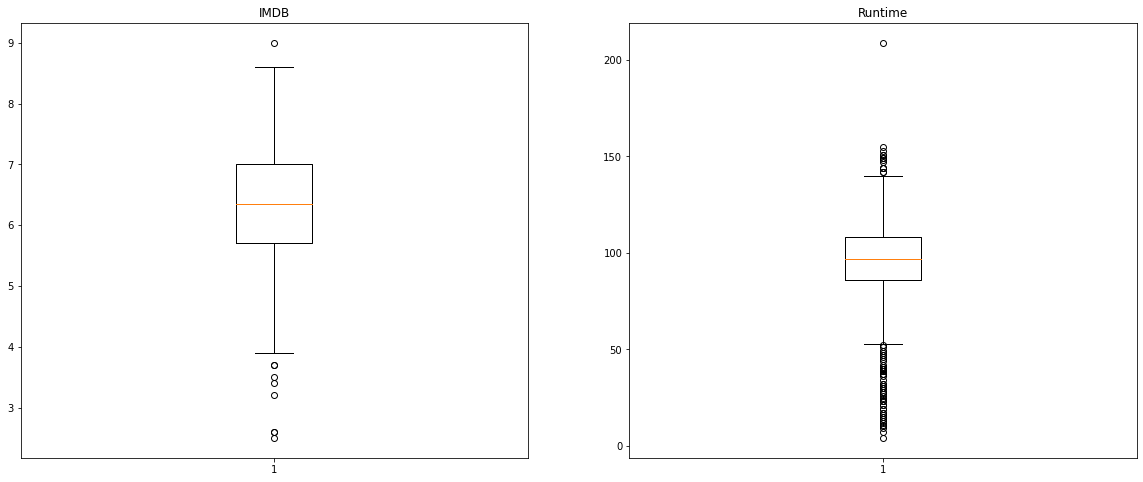

In [ ]:
soru15 = veri


fig, (ax1, ax2) = mt.subplots(1, 2,figsize= (20, 8))
 
ax1.boxplot(soru15["IMDB Score"])
ax1.set_title("IMDB")
 
ax2.boxplot(soru15["Runtime"])
ax2.set_title("Runtime")

 
mt.show()

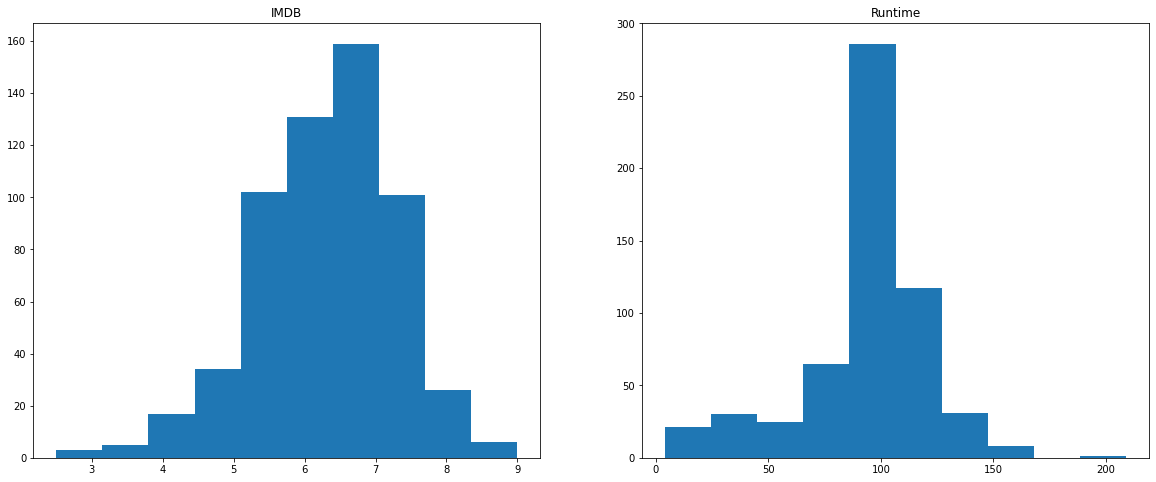

In [ ]:
fig, (ax3, ax4 ) = mt.subplots(1, 2, figsize = (20, 8))


ax3.hist(soru15["IMDB Score"])
ax3.set_title("IMDB")

ax4.hist(soru15["Runtime"])
ax4.set_title("Runtime")

mt.show()

In [16]:
sake = veri.sort_values("Runtime",ascending=False)
sake.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
561,The Irishman,Crime drama,"November 27, 2019",209,7.8,English
328,Da 5 Bloods,War drama,"June 12, 2020",155,6.5,English
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
247,Citation,Drama,"November 6, 2020",151,6.2,English
284,The Forest of Love,Drama,"October 11, 2019",151,6.3,Japanese


The Irishman	 verisi 209 Runtime ile aykırı veridir diğerlerine göre açık ara bir fark var.


